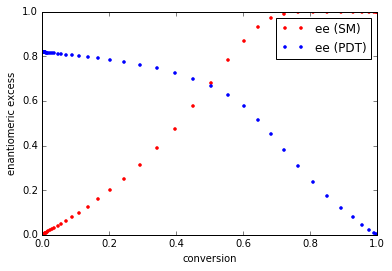

In [57]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import exp

# rate constants
k_R    = 1.0
k_S    =  0.1

# starting concentrations
SM_R_0 =  0.5
SM_S_0 =  0.5
total_concentration = SM_R_0 + SM_S_0

# simulate
time = np.logspace(-3,2,50)
indices = range(len(time))

SM_R  = [ SM_R_0 * exp(-k_R*t) for t in time ]
PDT_R = [ SM_R_0 - i for i in SM_R ]
SM_S  = [ SM_S_0 * exp(-k_S*t) for t in time ]
PDT_S = [ SM_S_0 - i for i in SM_S ]

conversion = [ (PDT_R[i] + PDT_S[i]) / total_concentration for i in indices ]
ee_SM      = [ (SM_S[i] - SM_R[i]) / (SM_R[i] + SM_S[i]) for i in indices ]
ee_PDT     = [ (PDT_R[i] - PDT_S[i]) / (PDT_R[i] + PDT_S[i]) for i in indices ]

# plot
plt.plot(conversion, ee_SM, "r.", label="ee (SM)")
plt.plot(conversion, ee_PDT, "b.", label="ee (PDT)")
plt.xlabel("conversion")
plt.ylabel("enantiomeric excess")
plt.legend(loc="best")

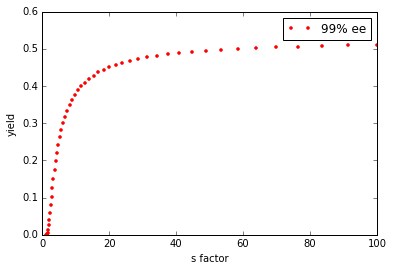

In [63]:
from scipy.interpolate import interp1d

def SM_yield(target_ee, selectivity):
    k_R = k_S * selectivity

    SM_R  = [ SM_R_0 * exp(-k_R*t) for t in time ]
    PDT_R = [ SM_R_0 - i for i in SM_R ]
    SM_S  = [ SM_S_0 * exp(-k_S*t) for t in time ]
    PDT_S = [ SM_S_0 - i for i in SM_S ]

    conversion = [ (PDT_R[i] + PDT_S[i]) / total_concentration for i in indices ]
    ee_SM      = [ (SM_S[i] - SM_R[i]) / (SM_R[i] + SM_S[i]) for i in indices ]
        
    if max(ee_SM) < target_ee:
        return 0.0
        
    interpolation_function = interp1d(ee_SM, conversion)
    interpolated_conversion = interpolation_function(target_ee)
    this_yield = 1.0 - interpolated_conversion
    return this_yield
        
target_ee = 0.99
selectivities = np.logspace(0.1, 2, 50)
yields = [ SM_yield(target_ee, i) for i in selectivities ]

plt.plot(selectivities, yields_90, "r.", label="99% ee")
plt.legend(loc="best")
plt.xlabel("s factor")
plt.ylabel("yield")